In [59]:
%matplotlib inline


# Functional Principal Component Analysis

Explores the two possible ways to do functional principal component analysis.


In [112]:
# Author: Yujian Hong
# License: MIT

import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from skfda.representation.grid import FDataGrid
import copy

In [128]:
csvs = ['LKnee_MN04_walk_dual.xlsx',  'LKnee_MN04_walk.xlsx']
dfs = [np.array(pd.read_excel(i, header=None, engine='openpyxl')) for i in csvs]

angles = [np.array(x[:101,:]) for x in dfs]
mean_angles = [np.mean(x, axis=1) for x in angles]
var_angles = [np.var(x, axis=1) for x in angles]
min_angles = [mean_angles[i] - var_angles[i] for i in range(len(mean_angles))]
max_angles = [mean_angles[i] + var_angles[i] for i in range(len(mean_angles))]

torques = [np.array(x[101:202,:]) for x in dfs]
mean_torques = [np.mean(x, axis=1) for x in torques]
var_torques = [np.var(x, axis=1) for x in torques]
min_torques = [mean_torques[i] - var_torques[i] for i in range(len(mean_torques))]
max_torques = [mean_torques[i] + var_torques[i] for i in range(len(mean_torques))]

a0 = angles[0].T
df = FDataGrid(a0)
fd = copy.deepcopy(df)

In this example we are going to use functional principal component analysis to
explore datasets and obtain conclusions about said dataset using this
technique.

First we are going to fetch the Berkeley Growth Study data. This dataset
correspond to the height of several boys and girls measured from birth to
when they are 18 years old. The number and time of the measurements are the
same for each individual. To better understand the data we plot it.



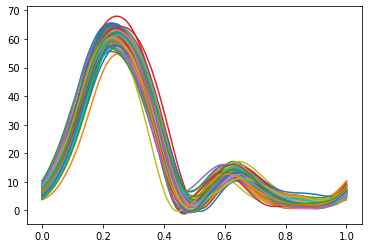

In [114]:
dataset = skfda.datasets.fetch_growth()
fd = copy.deepcopy(df)
#fd = dataset['data']
y = dataset['target']
plt1 = fd.plot()

FPCA can be done in two ways. The first way is to operate directly with the
raw data. We call it discretized FPCA as the functional data in this case
consists in finite values dispersed over points in a domain range.
We initialize and setup the FPCADiscretized object and run the fit method to
obtain the first two components. By default, if we do not specify the number
of components, it's 3. Other parameters are weights and centering. For more
information please visit the documentation.



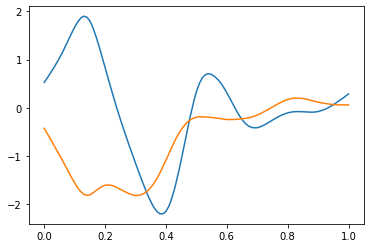

In [115]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(fd)
plt2 = fpca_discretized.components_.plot()

In the second case, the data is first converted to use a basis representation
and the FPCA is done with the basis representation of the original data.
We obtain the same dataset again and transform the data to a basis
representation. This is because the FPCA module modifies the original data.
We also plot the data for better visual representation.



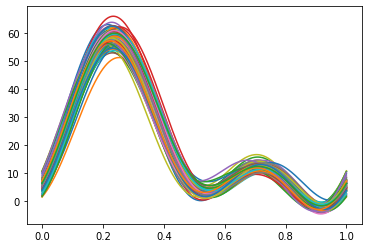

In [116]:
dataset = fetch_growth()
#fd = dataset['data']
fd = copy.deepcopy(df)
basis = skfda.representation.basis.Fourier(n_basis=4)
basis_fd = fd.to_basis(basis)
plt3 = basis_fd.plot()

We initialize the FPCABasis object and run the fit function to obtain the
first 2 principal components. By default the principal components are
expressed in the same basis as the data. We can see that the obtained result
is similar to the discretized case.



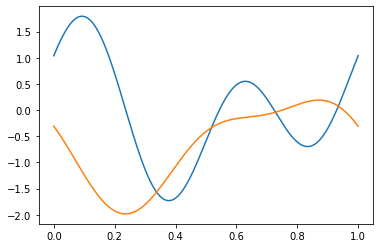

In [117]:
fpca = FPCA(n_components=2,components_basis=Fourier(n_basis=4))
fpca.fit(basis_fd)
plt4 = fpca.components_.plot()

To better illustrate the effects of the obtained two principal components,
we add and subtract a multiple of the components to the mean function.
We can then observe now that this principal component represents the
variation in the mean growth between the children.
The second component is more interesting. The most appropriate explanation is
that it represents the differences between girls and boys. Girls tend to grow
faster at an early age and boys tend to start puberty later, therefore, their
growth is more significant later. Girls also stop growing early



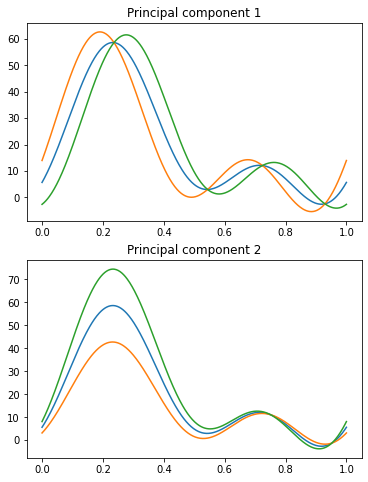

In [123]:
plt5 = plot_fpca_perturbation_graphs(basis_fd.mean(),
                              fpca.components_,
                              8,
                              fig=plt.figure(figsize=(6, 2 * 4)))

We can also specify another basis for the principal components as argument
when creating the FPCABasis object. For example, if we use the Fourier basis
for the obtained principal components we can see that the components are
periodic. This example is only to illustrate the effect. In this dataset, as
the functions are not periodic it does not make sense to use the Fourier
basis



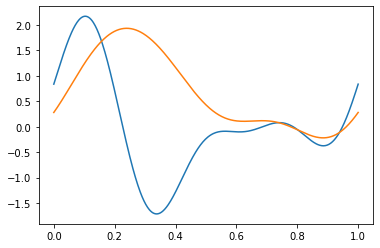

In [107]:
dataset = fetch_growth()
#fd = dataset['data']
fd = copy.deepcopy(df)
basis_fd = fd.to_basis(BSpline(n_basis=7))
fpca = FPCA(n_components=2, components_basis=Fourier(n_basis=7))
fpca.fit(basis_fd)
plt6 = fpca.components_.plot()

We can observe that if we switch to the Monomial basis, we also lose the
key features of the first principal components because it distorts the
principal components, adding extra maximums and minimums. Therefore, in this
case the best option is to use the BSpline basis as the basis for the
principal components



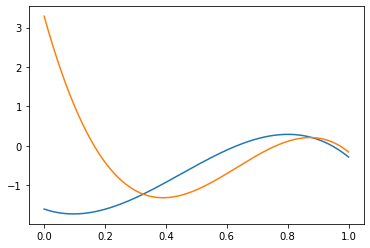

In [108]:
dataset = fetch_growth()
#fd = dataset['data']
fd = copy.deepcopy(df)
basis_fd = fd.to_basis(BSpline(n_basis=7))
fpca = FPCA(n_components=2, components_basis=Monomial(n_basis=4))
fpca.fit(basis_fd)
plt7 = fpca.components_.plot()